In [1]:
!pip install pandas seaborn tensorflow scikit-learn

  Using cached pandas-2.1.3-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Using cached seaborn-0.13.0-py3-none-any.whl (294 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 5.9 MB/s eta 0:00:0000:0100:01
  Using cached scikit_learn-1.3.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
  Using cached matplotlib-3.8.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached termcolor-2.4.0-py3-none-any.whl (7.7 kB)
  Using cached flatbuffers-23.5.26-py2.py3-none-any.whl (26 kB)
  Using cached absl_py-2.0.0-py3-none-any.whl (130 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tensorboard-2.15.1-py3-none-any.whl (5.5 MB)
  Using cached protobuf-4.25.1-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached ml_dtypes-0.2.0-cp39-cp39-manylinux_2_17_x86_64.manylin

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM, Conv1D, MaxPooling1D, TimeDistributed, Flatten, Dropout, RepeatVector
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

2023-12-08 14:39:22.010827: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-08 14:39:22.017504: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-08 14:39:22.061049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-08 14:39:22.061121: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-08 14:39:22.062424: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [3]:
energy_dataset = pd.read_csv('energy_dataset.csv')
weather_features = pd.read_csv('weather_features.csv')

In [5]:
#scaler = MinMaxScaler(feature_range=(0, 1))
#weather_features_scaled = scaler.fit_transform(weather_features)

In [5]:
energy_dataset.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [6]:
# clean dataset 
energy_dataset = energy_dataset.drop(['generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat','generation geothermal','generation hydro pumped storage aggregated', 'generation marine', 'generation wind offshore', 'forecast wind offshore eday ahead','total load forecast', 'forecast solar day ahead','forecast wind onshore day ahead'], axis=1)

In [7]:
energy_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35064 non-null  object 
 1   generation biomass                           35045 non-null  float64
 2   generation fossil brown coal/lignite         35046 non-null  float64
 3   generation fossil gas                        35046 non-null  float64
 4   generation fossil hard coal                  35046 non-null  float64
 5   generation fossil oil                        35045 non-null  float64
 6   generation hydro pumped storage consumption  35045 non-null  float64
 7   generation hydro run-of-river and poundage   35045 non-null  float64
 8   generation hydro water reservoir             35046 non-null  float64
 9   generation nuclear                           35047 non-null  float64
 10

In [7]:
# Convert time to datetime object and set it as index

energy_dataset['time'] = pd.to_datetime(energy_dataset['time'], utc=True, infer_datetime_format=True)
energy_dataset = energy_dataset.set_index('time')

/tmp/ipykernel_43/2460411205.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  energy_dataset['time'] = pd.to_datetime(energy_dataset['time'], utc=True, infer_datetime_format=True)


In [8]:
# Find NaNs and duplicates in df_energy

print('There are {} missing values or NaNs in energy_dataset.'
      .format(energy_dataset.isnull().values.sum()))

temp_energy = energy_dataset.duplicated(keep='first').sum()

print('There are {} duplicate rows in energy_dataset based on all columns.'
      .format(temp_energy))

There are 292 missing values or NaNs in energy_dataset.
There are 0 duplicate rows in energy_dataset based on all columns.


Filling missing values using interpolation.

In [9]:
# Find the number of NaNs in each column

energy_dataset.isnull().sum(axis=0)

generation biomass                             19
generation fossil brown coal/lignite           18
generation fossil gas                          18
generation fossil hard coal                    18
generation fossil oil                          19
generation hydro pumped storage consumption    19
generation hydro run-of-river and poundage     19
generation hydro water reservoir               18
generation nuclear                             17
generation other                               18
generation other renewable                     18
generation solar                               18
generation waste                               19
generation wind onshore                        18
total load actual                              36
price day ahead                                 0
price actual                                    0
dtype: int64

In [10]:
# Define a function to plot different types of time-series

def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    """
    Plots a certain time-series which has either been loaded in a dataframe
    and which constitutes one of its columns or it a custom pandas series 
    created by the user. The user can define either the 'df' and the 'column' 
    or the 'series' and additionally, can also define the 'label', the 
    'ylabel', the 'title', the 'start' and the 'end' of the plot.
    """
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

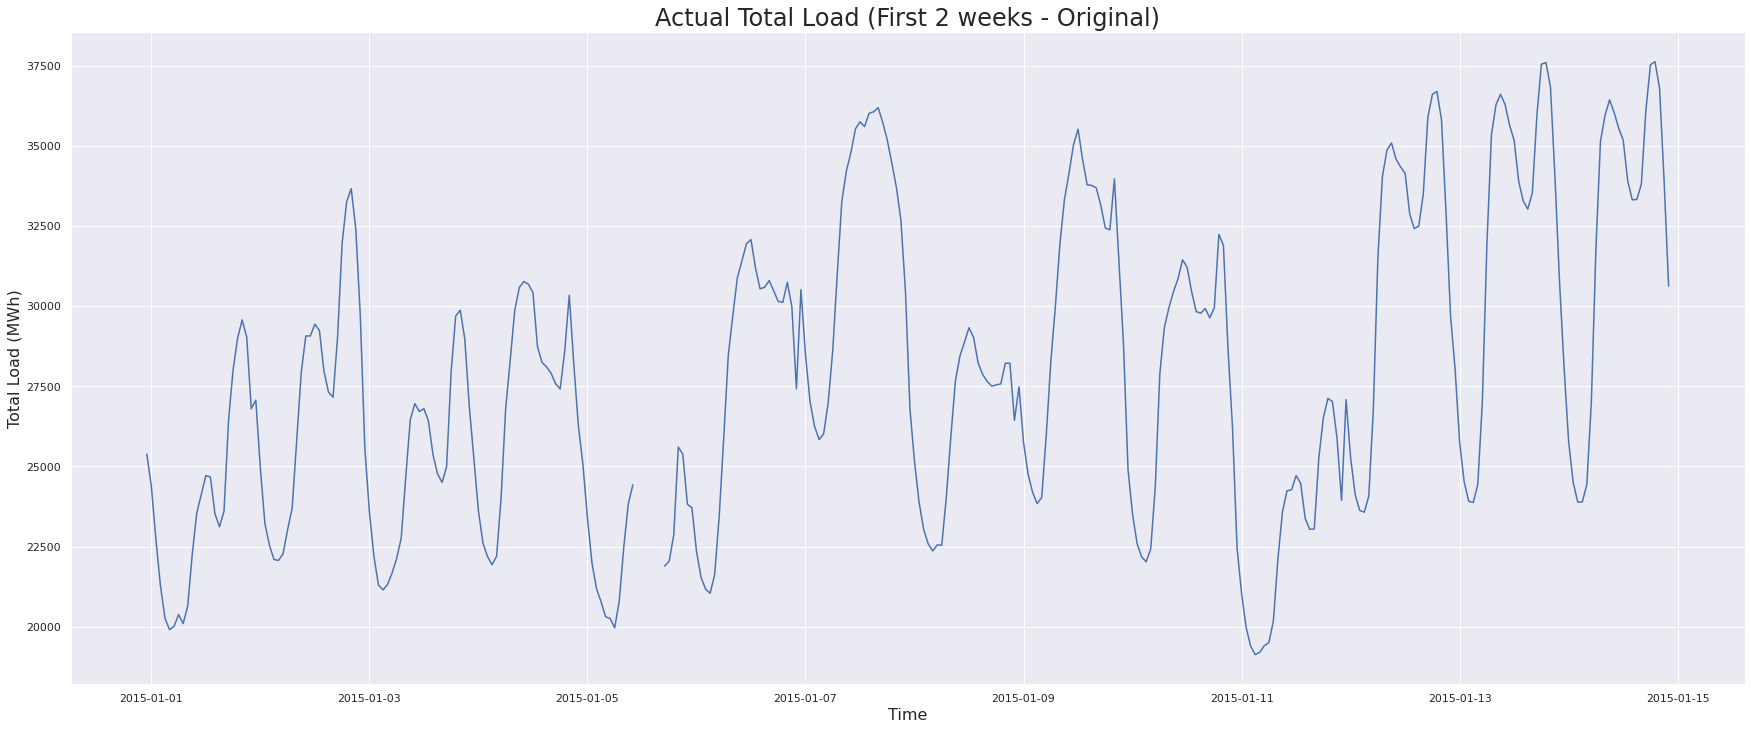

In [11]:
# Zoom into the plot of the hourly (actual) total load

ax = plot_series(df=energy_dataset, column='total load actual', ylabel='Total Load (MWh)',
                 title='Actual Total Load (First 2 weeks - Original)', end=24*7*2)
plt.show()

In [12]:
# Fill null values using interpolation

energy_dataset.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)
# Display the number of non-zero values in each column

print('Non-zero values in each column:\n', energy_dataset.astype(bool).sum(axis=0), sep='\n')

Non-zero values in each column:

generation biomass                             35060
generation fossil brown coal/lignite           24540
generation fossil gas                          35063
generation fossil hard coal                    35061
generation fossil oil                          35061
generation hydro pumped storage consumption    22450
generation hydro run-of-river and poundage     35061
generation hydro water reservoir               35061
generation nuclear                             35061
generation other                               35060
generation other renewable                     35061
generation solar                               35061
generation waste                               35061
generation wind onshore                        35061
total load actual                              35064
price day ahead                                35064
price actual                                   35064
dtype: int64


## cleaning weather data

In [13]:
def df_convert_dtypes(df, convert_from, convert_to):
    cols = df.select_dtypes(include=[convert_from]).columns
    for col in cols:
        df[col] = df[col].values.astype(convert_to)
    return df

In [14]:
# Convert columns with int64 type values to float64 type

weather_features = df_convert_dtypes(weather_features, np.int64, np.float64)

In [15]:
# Convert dt_iso to datetime type, rename it and set it as index

weather_features['time'] = pd.to_datetime(weather_features['dt_iso'], utc=True, infer_datetime_format=True)
weather_features = weather_features.drop(['dt_iso'], axis=1)
weather_features = weather_features.set_index('time')

/tmp/ipykernel_43/1927151892.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  weather_features['time'] = pd.to_datetime(weather_features['dt_iso'], utc=True, infer_datetime_format=True)


In [16]:
# Find NaNs and duplicates in weather_features

print('There are {} missing values or NaNs in weather_features.'
      .format(weather_features.isnull().values.sum()))

temp_weather = weather_features.duplicated(keep='first').sum()

print('There are {} duplicate rows in weather_features based on all columns.'
      .format(temp_weather))

There are 0 missing values or NaNs in weather_features.
There are 8622 duplicate rows in weather_features based on all columns.


In [17]:

weather_features_2 = weather_features.reset_index().drop_duplicates(subset=['time', 'city_name'], 
                                                        keep='last').set_index('time')

weather_features = weather_features.reset_index().drop_duplicates(subset=['time', 'city_name'],
                                                      keep='first').set_index('time')

In [18]:
# Drop columns with qualitative weather information
weather_features = weather_features.drop(['weather_main', 'weather_id', 
                              'weather_description', 'weather_icon'], axis=1)

In [19]:
# Replace outliers in 'pressure' with NaNs

weather_features.loc[weather_features.pressure > 1051, 'pressure'] = np.nan
weather_features.loc[weather_features.pressure < 931, 'pressure'] = np.nan

In [20]:
# Replace outliers in 'wind_speed' with NaNs

weather_features.loc[weather_features.wind_speed > 50, 'wind_speed'] = np.nan

In [21]:
# Fill null values using interpolation

weather_features.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)

/tmp/ipykernel_43/3651013418.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weather_features.interpolate(method='linear', limit_direction='forward', inplace=True, axis=0)


## merging the datasets

In [22]:
# Split the weather_features into 5 dataframes (one for each city)

df_1, df_2, df_3, df_4, df_5 = [x for _, x in weather_features.groupby('city_name')]
dfs = [df_1, df_2, df_3, df_4, df_5]

In [23]:
# Merge all dataframes into the final dataframe

final_dataset = energy_dataset

for df in dfs:
    city = df['city_name'].unique()
    city_str = str(city).replace("'", "").replace('[', '').replace(']', '').replace(' ', '')
    df = df.add_suffix('_{}'.format(city_str))
    final_dataset = final_dataset.merge(df, on=['time'], how='outer')
    final_dataset = final_dataset.drop('city_name_{}'.format(city_str), axis=1)
    
final_dataset.columns

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore', 'total load actual',
       'price day ahead', 'price actual', 'temp_Barcelona',
       'temp_min_Barcelona', 'temp_max_Barcelona', 'pressure_Barcelona',
       'humidity_Barcelona', 'wind_speed_Barcelona', 'wind_deg_Barcelona',
       'rain_1h_Barcelona', 'rain_3h_Barcelona', 'snow_3h_Barcelona',
       'clouds_all_Barcelona', 'temp_Bilbao', 'temp_min_Bilbao',
       'temp_max_Bilbao', 'pressure_Bilbao', 'humidity_Bilbao',
       'wind_speed_Bilbao', 'wind_deg_Bilbao', 'rain_1h_Bilbao',
       'rain_3h_Bilbao', 'snow_3h_Bilbao', 'clo

In [24]:
cities = ['Barcelona', 'Bilbao', 'Madrid', 'Seville', 'Valencia']

for city in cities:
    final_dataset = final_dataset.drop(['rain_3h_{}'.format(city)], axis=1)

In [25]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i : i + target_size])

    return np.array(data), np.array(labels)

In [26]:
train_end_idx = 27048
cv_end_idx = 31056
test_end_idx = 35064

In [27]:
X = final_dataset[final_dataset.columns.drop('price actual')].values
y = final_dataset['price actual'].values

y = y.reshape(-1, 1)

In [28]:
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

In [29]:
scaler_X.fit(X[:train_end_idx])
scaler_y.fit(y[:train_end_idx])

MinMaxScaler()

In [30]:
X_norm = scaler_X.transform(X)
y_norm = scaler_y.transform(y)

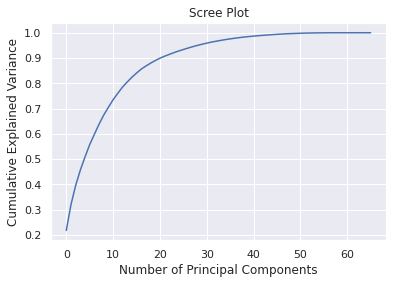

In [31]:
# Perform PCA
pca = PCA()
principal_components = pca.fit_transform(X_norm)

# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the scree plot
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

In [37]:
pca = PCA()
X_pca = pca.fit(X_norm[:train_end_idx])

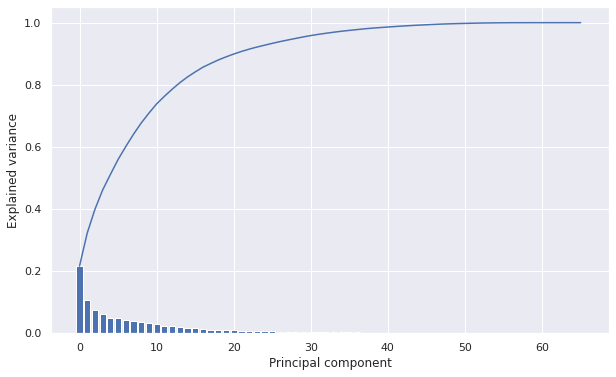

In [38]:
num_components = len(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.bar(np.arange(num_components), pca.explained_variance_ratio_)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal component')
plt.ylabel('Explained variance')
plt.show()

In [39]:
pca = PCA(n_components=0.90)
pca.fit(X_norm)
X_pca = pca.transform(X_norm)

In [40]:
X_pca.shape

(35064, 22)

In [41]:
dataset_norm = np.concatenate((X_pca, y_norm), axis=1)

past_history = 24
future_target = 0

In [42]:
X_train, y_train = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                     0, train_end_idx, past_history, 
                                     future_target, step=1, single_step=True)

In [43]:
X_val, y_val = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                 train_end_idx, cv_end_idx, past_history, 
                                 future_target, step=1, single_step=True)

In [44]:
X_test, y_test = multivariate_data(dataset_norm, dataset_norm[:, -1],
                                   cv_end_idx, test_end_idx, past_history, 
                                   future_target, step=1, single_step=True)

In [45]:
batch_size = 32
buffer_size = 1000

In [46]:
train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train = train.cache().shuffle(buffer_size).batch(batch_size).prefetch(1)

validation = tf.data.Dataset.from_tensor_slices((X_val, y_val))
validation = validation.batch(batch_size).prefetch(1)

In [47]:
# Define some common parameters

input_shape = X_train.shape[-2:]
loss = tf.keras.losses.MeanSquaredError()
metric = [tf.keras.metrics.RootMeanSquaredError()]
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
              lambda epoch: 1e-4 * 10**(epoch / 10))
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10)

In [48]:
y_test = y_test.reshape(-1, 1)
y_test_inv = scaler_y.inverse_transform(y_test)

In [49]:
def plot_model_rmse_and_loss(history):
    
    # Evaluate train and validation accuracies and losses
    
    train_rmse = history.history['root_mean_squared_error']
    val_rmse = history.history['val_root_mean_squared_error']
    
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Visualize epochs vs. train and validation accuracies and losses
    
    plt.figure(figsize=(20, 10))
    plt.subplot(1, 2, 1)
    plt.plot(train_rmse, label='Training RMSE')
    plt.plot(val_rmse, label='Validation RMSE')
    plt.legend()
    plt.title('Epochs vs. Training and Validation RMSE')
    
    plt.subplot(1, 2, 2)
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend()
    plt.title('Epochs vs. Training and Validation Loss')
    
    plt.show()

In [50]:
tf.keras.backend.clear_session()

multivariate_stacked_lstm = tf.keras.models.Sequential([
    LSTM(250, input_shape=input_shape, 
         return_sequences=True),
    LSTM(150, return_sequences=True),
    Flatten(),
    Dense(150, activation='relu'),
    Dropout(0.1),
    Dense(1)
])
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
                   'multivariate_stacked_lstm.h5', save_best_only=True)
optimizer = tf.keras.optimizers.Adam(lr=3e-3, amsgrad=True)

multivariate_stacked_lstm.compile(loss=loss,
                                  optimizer=optimizer,
                                  metrics=metric)

In [ ]:
history = multivariate_stacked_lstm.fit(train, epochs=10,
                                validation_data=validation,
                                callbacks=[early_stopping, 
                                           model_checkpoint])

Epoch 1/10
845/845 [==============================] - 100s 114ms/step - loss: 0.0055 - root_mean_squared_error: 0.0741 - val_loss: 0.0041 - val_root_mean_squared_error: 0.0641
Epoch 2/10
  1/845 [..............................] - ETA: 46s - loss: 0.0088 - root_mean_squared_error: 0.0936

/opt/conda/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


845/845 [==============================] - 99s 118ms/step - loss: 0.0026 - root_mean_squared_error: 0.0507 - val_loss: 0.0030 - val_root_mean_squared_error: 0.0545
Epoch 3/10
845/845 [==============================] - 97s 115ms/step - loss: 0.0018 - root_mean_squared_error: 0.0419 - val_loss: 0.0016 - val_root_mean_squared_error: 0.0401
Epoch 4/10
845/845 [==============================] - 97s 114ms/step - loss: 0.0013 - root_mean_squared_error: 0.0355 - val_loss: 0.0012 - val_root_mean_squared_error: 0.0346
Epoch 5/10
  1/845 [..............................] - ETA: 51s - loss: 0.0024 - root_mean_squared_error: 0.0486

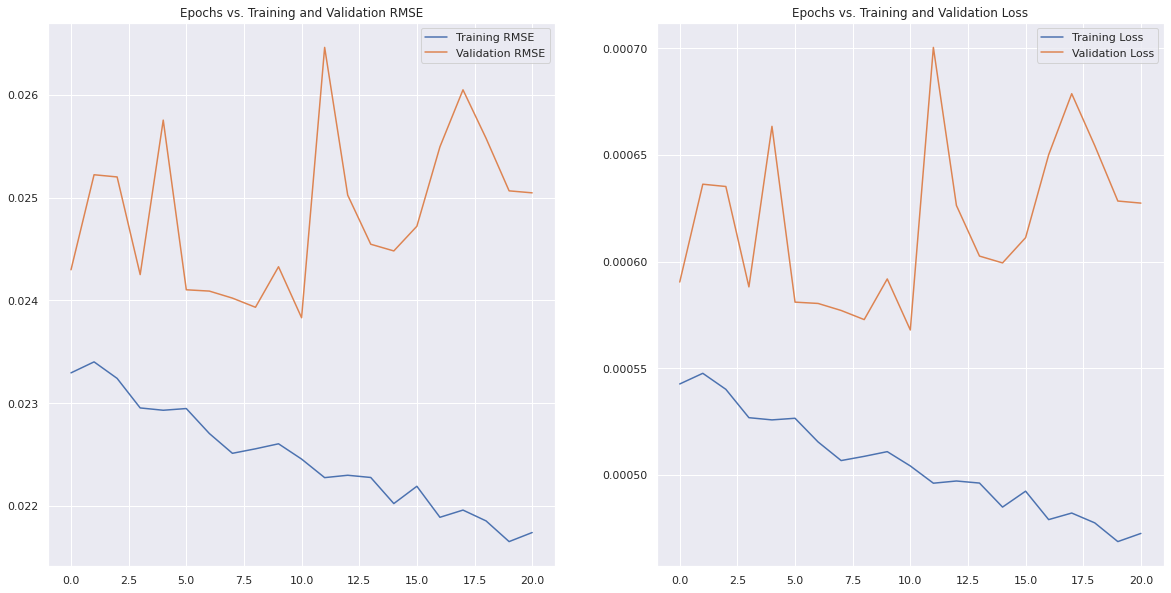

In [57]:
plot_model_rmse_and_loss(history)

In [62]:
multivariate_stacked_lstm = tf.keras.models.load_model('multivariate_stacked_lstm.h5')

forecast = multivariate_stacked_lstm.predict(X_test)
multivariate_stacked_lstm_forecast = scaler_y.inverse_transform(forecast)

rmse_mult_stacked_lstm = sqrt(mean_squared_error(y_test_inv, 
                                                 multivariate_stacked_lstm_forecast))
print('RMSE of hour-ahead electricity price multivariate Stacked LSTM forecast: {}'
      .format(round(rmse_mult_stacked_lstm, 3)))

125/125 [==============================] - 6s 43ms/step
RMSE of hour-ahead electricity price multivariate Stacked LSTM forecast: 2.257
